In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats
import pandas_profiling

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import summarize
import prepare
import env

In [2]:
# """SELECT p2.*, p1.logerror FROM predictions_2016 p1
# LEFT JOIN properties_2016 p2  USING(parcelid)
# WHERE (bedroomcnt > 0 AND bathroomcnt > 0 AND calculatedfinishedsquarefeet > 500 
# AND latitude IS NOT NULL AND longitude IS NOT NULL) 
# AND (unitcnt = 1 OR unitcnt IS NULL);"""

### Acquire df

- Use function from acquire.py to bring in df using sql query.

In [3]:
df = acquire.get_zillow_data()
df.sample()

,county,tax_rate,id,parcelid,airconditioningtypeid,airconditioningdesc,architecturalstyletypeid,architecturalstyledesc,basementsqft,bathroomcnt,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,typeconstructiontypeid,typeconstructiondesc,censustractandblock,transactiondate,logerror,transactions
33122,Los Angeles,0.01,2425459,12960014,nan,None,nan,None,nan,2.00,...,"442,000.00","7,234.14",None,nan,nan,None,"60,374,309,021,010.00",2017-06-22,0.02,1


### Summarize df

In [4]:
summarize.df_summary(df)

--- Shape: (52169, 72)
--- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52169 entries, 0 to 52168
Data columns (total 72 columns):
county                          52169 non-null object
tax_rate                        52164 non-null float64
id                              52169 non-null int64
parcelid                        52169 non-null int64
airconditioningtypeid           13605 non-null float64
airconditioningdesc             13605 non-null object
architecturalstyletypeid        70 non-null float64
architecturalstyledesc          70 non-null object
basementsqft                    47 non-null float64
bathroomcnt                     52169 non-null float64
bedroomcnt                      52169 non-null float64
buildingclasstypeid             0 non-null object
buildingclassdesc               0 non-null object
buildingqualitytypeid           33628 non-null float64
calculatedbathnbr               52153 non-null float64
calculatedfinishedsquarefeet    52161 non-null float64
deckt

   num_cols_missing    pct_cols_missing  num_rows
0                23  31.944444444444443         2
1                24   33.33333333333333        12
2                25   34.72222222222222        11
3                26   36.11111111111111        30
4                27                37.5       177
5                28   38.88888888888889       389
6                29   40.27777777777778      2527
7                30   41.66666666666667      2194
8                31   43.05555555555556      5986
9                32   44.44444444444444      8880
10               33   45.83333333333333     11960
11               34   47.22222222222222     11151
12               35   48.61111111111111      3459
13               36                50.0      4121
14               37  51.388888888888886      1016
15               38   52.77777777777778       214
16               39  54.166666666666664        22
17               40   55.55555555555556        13
18               41   56.94444444444444         3


(33339141.852, 33488434.7]      753
(33488434.7, 33636249.4]       3203
(33636249.4, 33784064.1]       6059
(33784064.1, 33931878.8]      10912
(33931878.8, 34079693.5]       9002
(34079693.5, 34227508.2]      12404
(34227508.2, 34375322.9]       4596
(34375322.9, 34523137.6]       1816
(34523137.6, 34670952.3]       2183
(34670952.3, 34818767.0]       1241
Name: latitude, dtype: int64
longitude:
(-119477336.781, -119283338.0]      158
(-119283338.0, -119091260.0]       1291
(-119091260.0, -118899182.0]       1050
(-118899182.0, -118707104.0]       1776
(-118707104.0, -118515026.0]       3838
(-118515026.0, -118322948.0]       9297
(-118322948.0, -118130870.0]       9990
(-118130870.0, -117938792.0]      11197
(-117938792.0, -117746714.0]       9121
(-117746714.0, -117554636.0]       4451
Name: longitude, dtype: int64
lotsizesquarefeet:
(-6734.775000000001, 697313.4]    51796
(697313.4, 1394390.8]                 8
(1394390.8, 2091468.2]                2
(2091468.2, 2788545.6]         

In [56]:
df.shape

(51657, 22)

In [5]:
#df = df.loc[:,~df.columns.duplicated()] 

### Explore df

- Here I'll explore the dataframe to help me decide what needs to be prepped/cleaned for my model.

In [6]:
#pandas_profiling.ProfileReport(df)

- Write a function that takes in a dataframe of observations and attributes and returns a df where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [7]:
summarize.nulls_by_col(df)

,num_rows_missing,pct_rows_missing
county,0,0.00
tax_rate,5,0.00
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,38564,0.74
airconditioningdesc,38564,0.74
architecturalstyletypeid,52099,1.00
architecturalstyledesc,52099,1.00
basementsqft,52122,1.00
bathroomcnt,0,0.00


#### Takeaways from nulls in columns function

- I can see that there are columns that have no data in them, and those I will certainly drop. 


- There are others that are more than 50% NULL values, and I'm going to drop those as well. That is too high of a percentage of Nulls to make the data meaningful.

- Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [8]:
summarize.nulls_by_row(df)

,num_cols_missing,pct_cols_missing,num_rows
0,23,31.944444444444443,2
1,24,33.33333333333333,12
2,25,34.72222222222222,11
3,26,36.11111111111111,30
4,27,37.5,177
5,28,38.88888888888889,389
6,29,40.27777777777778,2527
7,30,41.66666666666667,2194
8,31,43.05555555555556,5986
9,32,44.44444444444444,8880


#### Takeaways from the nulls by row function

- For my first iteration of the pipeline, I'm going to drop any rows that have missing values. 


- I will go back and add back and possibly impute values after my first iteration.

- This function will drop columns that are not 50% non-missing values and rows that are not 75% non-missing values

In [9]:
df = prepare.handle_missing_values(df)

In [10]:
df.isnull().sum()

county                              0
tax_rate                            5
id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18541
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
fips                                0
state                               0
fullbathcnt                        16
heatingorsystemtypeid           18345
heatingorsystemdesc             18345
latitude                            0
longitude                           0
lotsizesquarefeet                 354
propertycountylandusecode           0
propertylandusetypeid               0
propertylandusedesc                 0
propertyzoningdesc              18479
rawcensustractandblock              0
regionidcity                     1028
regionidcounty                      0
regionidzip                        23
roomcnt     

- I am removing columns for the following reasons...

    - "unitcnt", "propertyzoningdesc", "heatingorsystemdesc", 
      "heatingorsystemtypeid", "buildingqualitytypeid" : missing 18,451 values
    
    - "assessmentyear": constant value of 2016
    
    - "calculatedbathnbr": has a correlation of 1.0 with bathroomcnt
    
    - "finishedsquarefeet12": has a correlcation of 1.0 with calculatedsquarefeet
    
    - "propertylandusedesc", "propertylandusetypeid": these are all "261" or single family residential.
    
    - "rawcensustractandblack": is highly correlated with fips/county
    
    - "state": are all California; not useful in analysis
    
    - "regionidcity": is represented by zipcodes
    
    - "roomcnt": over 36,000 values are 0 rooms

In [15]:
cols_to_remove = ["unitcnt", "propertyzoningdesc", "heatingorsystemdesc", 
                  "heatingorsystemtypeid", "buildingqualitytypeid", "assessmentyear",
                  "calculatedbathnbr", "finishedsquarefeet12", "propertylandusedesc", 
                  "propertylandusetypeid", "rawcensustractandblock" , "regionidcity",
                  "state", "id", "fullbathcnt", "roomcnt"]

- This function removes the columns above from the dataframe for the reasons I listed above.

In [16]:
df = prepare.remove_columns(df, cols_to_remove)

- Drop rows with missing values using a df.dropna(), so I can run through my first iteration of exploration with visuals using numeric or categorical data types without any missing values. 


- I may decide later to impute values and save rows for the following columns.


    - "tax_rate": has five rows with missing values in tax_rate

    - "yearbuilt": has 40 missing values that I can't impute in a meaningful way. Dropping 40 rows out of the df should not be a problem.
    
    - "censustractandblock": has 112 values I can't impute in a meaningful way. I'll drop these rows.
    
    - "lotsizesquarefeet": 
    
    - "regionidcity":
    
    - "regionidzip":
    
    - "taxvaluedollarcnt":
    
    - "yearbuilt":
    
    - "structuretaxvaluedollarcnt":
    
    - "landtaxvaluedollarcnt":
    
    - "taxamount":
    
    - "censustractandblock":

In [ ]:
#rows_to_drop = ["tax_rate", "lotsizesquarefeet", "regionidcity", "regionidzip", "taxvaluedollarcnt", "yearbuilt", "structuretaxvaluedollarcnt", "landtaxvaluedollarcnt", "taxamount", "censustractandblock"]

In [17]:
df.dropna(inplace=True)

- Verify there are no more missing values in my dataframe.


    - I'll be ready for visual exploration and transforming data types.

In [18]:
df.isnull().sum()

county                          0
tax_rate                        0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
regionidcounty                  0
regionidzip                     0
taxvaluedollarcnt               0
yearbuilt                       0
structuretaxvaluedollarcnt      0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
transactiondate                 0
logerror                        0
transactions                    0
dtype: int64

- I have 51, 657 rows and 26 columns remaining in my dataframe for my first iteration.

In [20]:
df.shape

(51657, 22)

In [21]:
df.dtypes

county                           object
tax_rate                        float64
parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fips                            float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
regionidcounty                  float64
regionidzip                     float64
taxvaluedollarcnt               float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
landtaxvaluedollarcnt           float64
taxamount                       float64
censustractandblock             float64
transactiondate                  object
logerror                        float64
transactions                      int64
dtype: object

- For the first iteration, I'm including transactiondate in column conversion to category. If I need to convert it to a datetime later, I will come back and run this.


- Later, I may decide to convert transactiondate column to data type datetime using the code below.

In [ ]:
#df.transactiondate = pd.to_datetime(df.transactiondate, format='%Y-%m-%d')
#zillow = zillow.sort_values("transactiondate").drop_duplicates('parcelid',keep='last')

- Convert the following columns to category data types using a function.

In [24]:
cols = ["censustractandblock","county", "transactiondate",  "fips", "propertycountylandusecode", "parcelid", "regionidcounty", "regionidzip", "yearbuilt", "transactions"]

In [25]:
df = prepare.numeric_to_category(df, cols)

In [26]:
df.dtypes

county                          category
tax_rate                         float64
parcelid                        category
bathroomcnt                      float64
bedroomcnt                       float64
calculatedfinishedsquarefeet     float64
fips                            category
latitude                         float64
longitude                        float64
lotsizesquarefeet                float64
propertycountylandusecode       category
regionidcounty                  category
regionidzip                     category
taxvaluedollarcnt                float64
yearbuilt                       category
structuretaxvaluedollarcnt       float64
landtaxvaluedollarcnt            float64
taxamount                        float64
censustractandblock             category
transactiondate                 category
logerror                         float64
transactions                    category
dtype: object

- Here I'm creating a dataframe that holds only the numeric values, so I can make a heatmap.

In [27]:
df_nums = df.select_dtypes(exclude="category")

In [33]:
df_nums.shape

(51657, 12)

- Visualize correlation between numeric values in data.

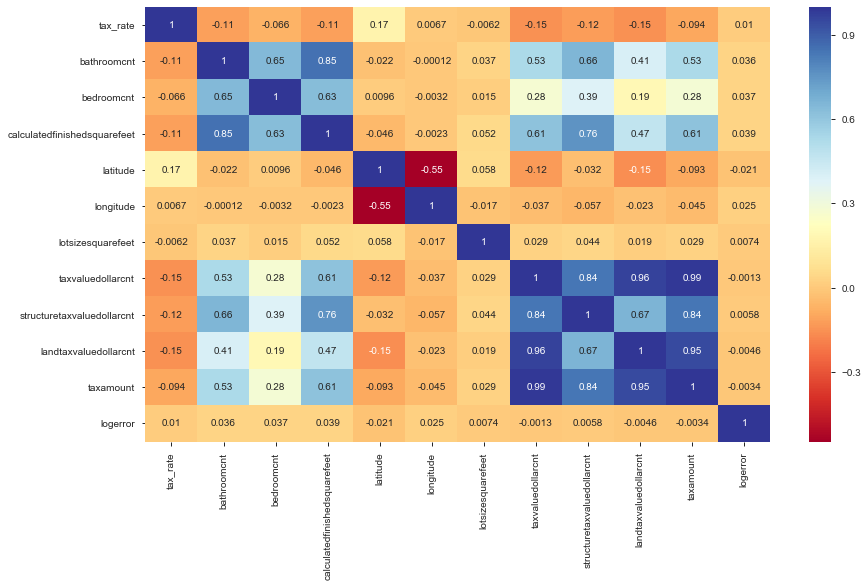

In [61]:
plt.figure(figsize=(14,8))
sns.heatmap(df_nums.corr(), cmap='RdYlBu', annot=True)

- Plot variables using jointplots

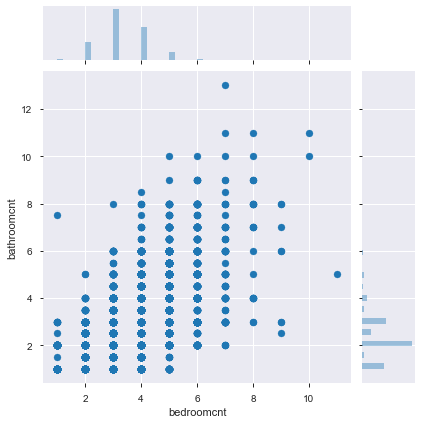

In [38]:
sns.jointplot(data=df, x="bedroomcnt", y="bathroomcnt")

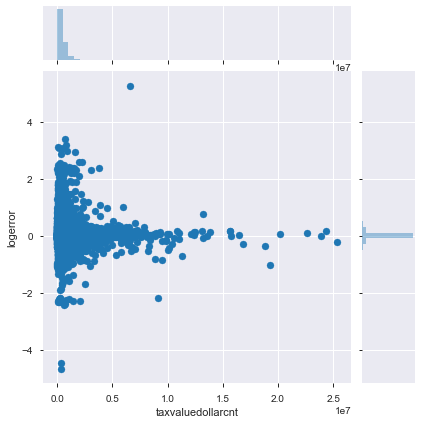

In [42]:
sns.jointplot(data=df, x="taxvaluedollarcnt" , y="logerror" )

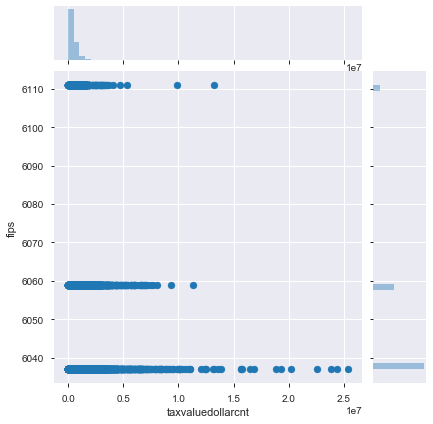

In [49]:
sns.jointplot(data=df, x="taxvaluedollarcnt" , y="fips" )

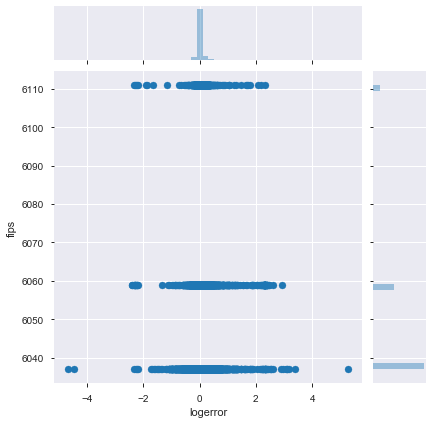

In [52]:
sns.jointplot(data=df, x="logerror" , y="fips" )

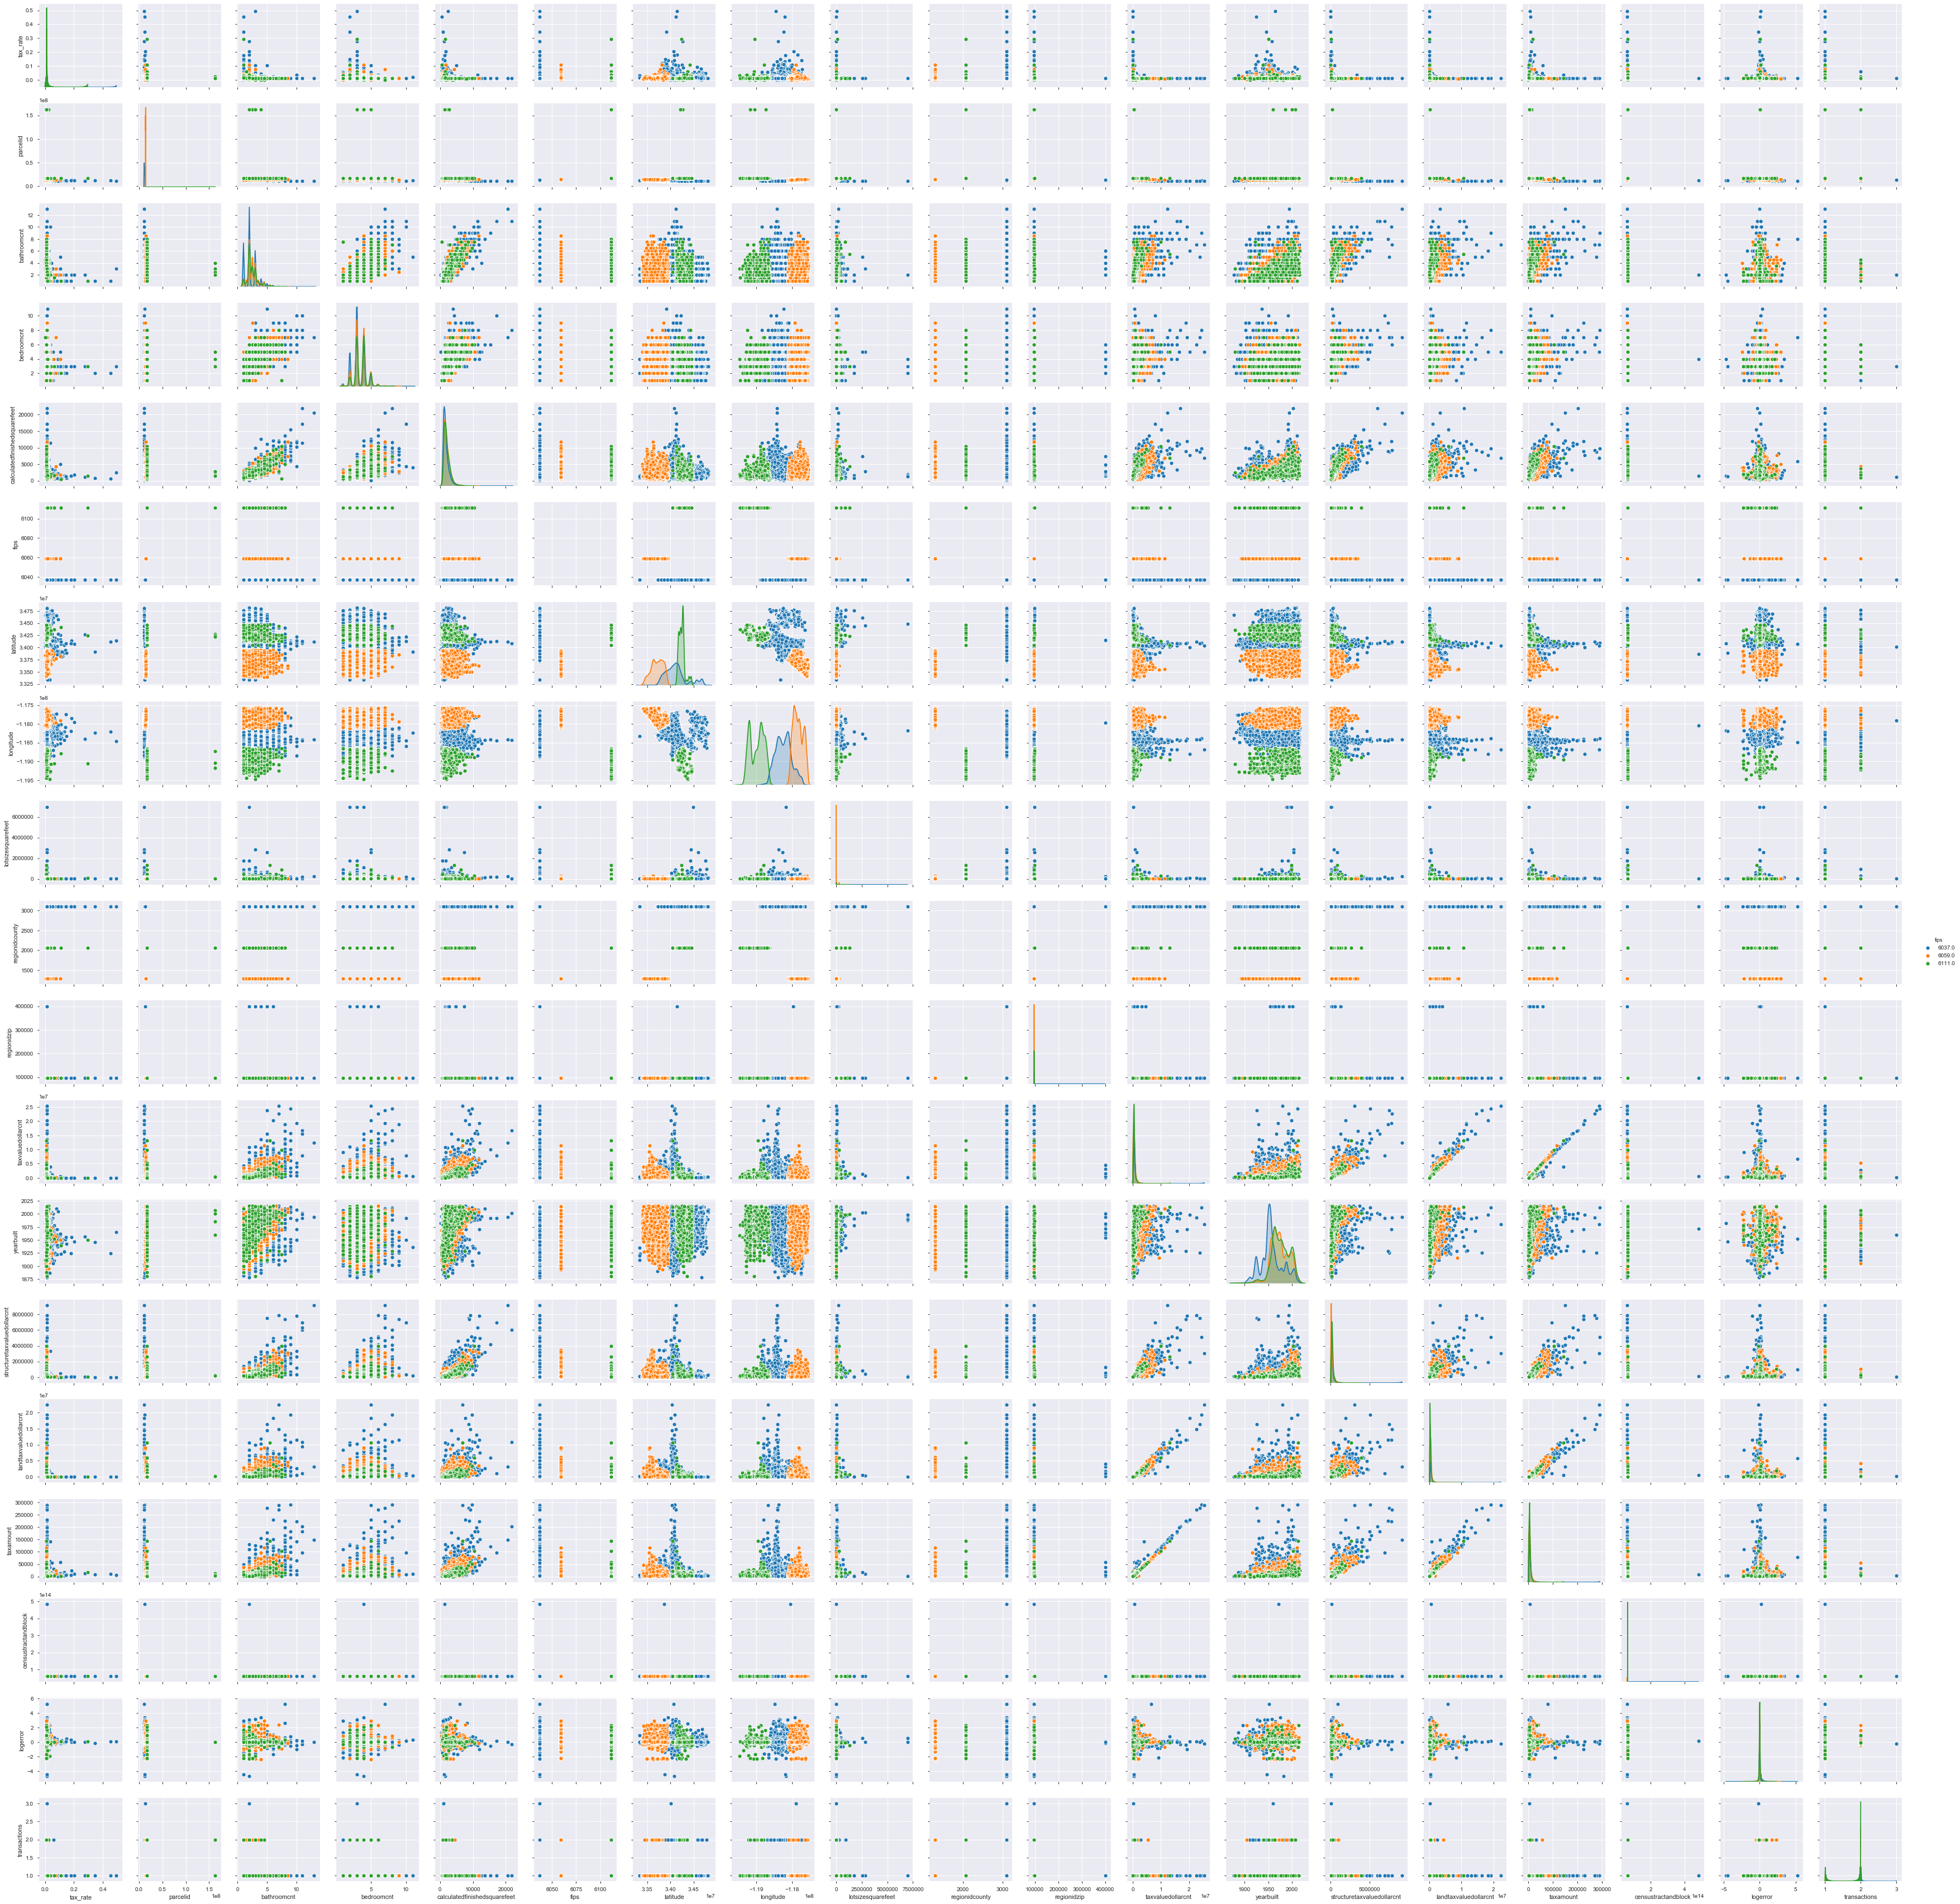

In [55]:
sns.pairplot(df, hue="fips")

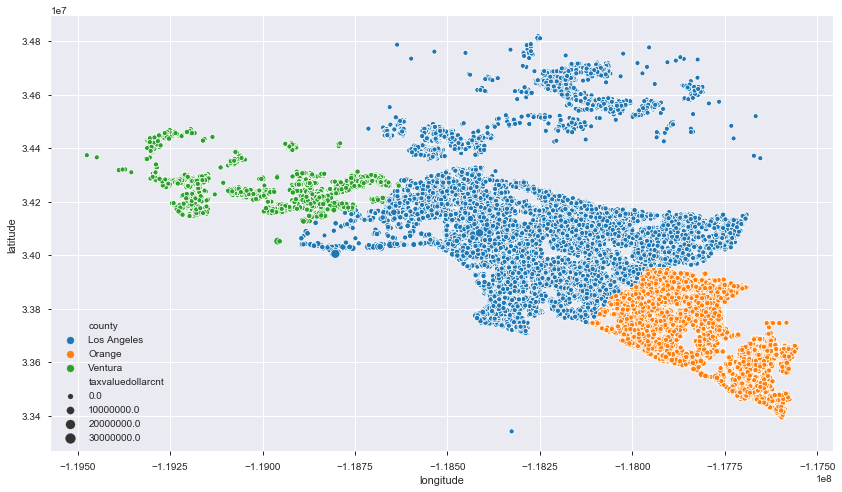

In [60]:
plt.figure(figsize=(14,8))
sns.scatterplot(y="latitude", x="longitude", data=df, hue="county", size="taxvaluedollarcnt")
plt.legend()
